# Tensorflow

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We work with TF1 but ask it to emulate TF2 behavior

In [4]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

In [5]:
%%capture
import tensorflow_probability as tfp
tfd = tfp.distributions

## Working with tensors

Almost exaclty like numpy arrays.`m

In [6]:
tf.constant([1., 2., 3.])

<tf.Tensor: id=0, shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [7]:
x = tf.Variable([[1.,2.,3.], [4.,5.,6.]])

In [8]:
x.shape

TensorShape([2, 3])

In [9]:
x.dtype

tf.float32

### Conversin to numpy

In [10]:
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

### Indexing

In [11]:
x[:, :2]

<tf.Tensor: id=16, shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [4., 5.]], dtype=float32)>

### Assignment

In [12]:
x[0,:].assign([3.,2.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 2., 1.],
       [4., 5., 6.]], dtype=float32)>

In [13]:
x

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 2., 1.],
       [4., 5., 6.]], dtype=float32)>

### Reductions

In [14]:
tf.reduce_mean(x, axis=0)

<tf.Tensor: id=30, shape=(3,), dtype=float32, numpy=array([3.5, 3.5, 3.5], dtype=float32)>

In [15]:
tf.reduce_sum(x, axis=1)

<tf.Tensor: id=34, shape=(2,), dtype=float32, numpy=array([ 6., 15.], dtype=float32)>

### Broadcasting

In [16]:
x + 10

<tf.Tensor: id=38, shape=(2, 3), dtype=float32, numpy=
array([[13., 12., 11.],
       [14., 15., 16.]], dtype=float32)>

In [17]:
x * 10

<tf.Tensor: id=42, shape=(2, 3), dtype=float32, numpy=
array([[30., 20., 10.],
       [40., 50., 60.]], dtype=float32)>

In [18]:
x - tf.reduce_mean(x, axis=1)[:, tf.newaxis]

<tf.Tensor: id=52, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  0., -1.],
       [-1.,  0.,  1.]], dtype=float32)>

### Matrix operations

In [19]:
x @ tf.transpose(x)

<tf.Tensor: id=58, shape=(2, 2), dtype=float32, numpy=
array([[14., 28.],
       [28., 77.]], dtype=float32)>

### Ufuncs

In [20]:
tf.exp(x)

<tf.Tensor: id=61, shape=(2, 3), dtype=float32, numpy=
array([[ 20.085537 ,   7.389056 ,   2.7182817],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

In [21]:
tf.sqrt(x)

<tf.Tensor: id=64, shape=(2, 3), dtype=float32, numpy=
array([[1.7320508, 1.4142135, 1.       ],
       [2.       , 2.236068 , 2.4494898]], dtype=float32)>

### Random numbers

In [22]:
X = tf.random.normal(shape=(10,4))
y = tf.random.normal(shape=(10,1))

### Linear algebra

In [23]:
tf.linalg.lstsq(X, y)

<tf.Tensor: id=82, shape=(4, 1), dtype=float32, numpy=
array([[-0.20034605],
       [-0.18362193],
       [-0.77986723],
       [-0.558746  ]], dtype=float32)>

### Vectorization

In [24]:
X = tf.random.normal(shape=(1000,10,4))
y = tf.random.normal(shape=(1000,10,1))

In [25]:
tf.linalg.lstsq(X, y)

<tf.Tensor: id=100, shape=(1000, 4, 1), dtype=float32, numpy=
array([[[ 0.04171363],
        [ 0.8832583 ],
        [ 0.5841526 ],
        [-0.48581767]],

       [[-0.73950046],
        [-0.22255968],
        [ 0.7190923 ],
        [ 0.5090183 ]],

       [[ 0.74239963],
        [-0.5741371 ],
        [-0.19040915],
        [ 0.1790382 ]],

       ...,

       [[-0.21469031],
        [-0.5195575 ],
        [-0.08611798],
        [ 0.2624016 ]],

       [[ 0.01139675],
        [ 0.3803665 ],
        [-0.1892877 ],
        [ 0.27254012]],

       [[ 0.21505316],
        [ 0.43938717],
        [-0.4075264 ],
        [-0.12740411]]], dtype=float32)>

### Automatic differntiation

In [26]:
def f(x,y):
    return x**2 + 2*y**2 + 3*x*y

#### Gradient

In [27]:
x, y = tf.Variable(1.0), tf.Variable(2.0)

In [28]:
with tf.GradientTape() as tape:
    z = f(x, y)

In [29]:
tape.gradient(z, [x,y])

[<tf.Tensor: id=186, shape=(), dtype=float32, numpy=8.0>,
 <tf.Tensor: id=187, shape=(), dtype=float32, numpy=11.0>]

#### Hessian

In [30]:
with tf.GradientTape(persistent=True) as H_tape:
    with tf.GradientTape() as J_tape:
        z = f(x, y)
    Js = J_tape.gradient(z, [x,y])
Hs = [H_tape.gradient(J, [x,y]) for J in Js]
del H_tape                    

In [31]:
np.array(Hs)

array([[2., 3.],
       [3., 4.]], dtype=float32)

## Keras

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
data = fetch_california_housing()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [35]:
y_train.min(), y_train.max()

(0.14999, 5.00001)

In [36]:
scalar = StandardScaler()
X_train_s = scalar.fit_transform(X_train)
X_test_s = scalar.transform(X_test)

In [37]:
import tensorflow.keras as keras

In [38]:
Dense = keras.layers.Dense

We can consider a DL model as just a black box with a bunch of unnown parameters. For exanple, when the outoput is a Dense layer with just one node, the entire network model is just doing some form of regression. Hence we can replace a linear regression model with such a neural network model and run MCMC or VI as usual.

In [39]:
model = keras.models.Sequential([
    Dense(30, 
          activation='elu', 
          input_shape=X_train.shape[1:]),
    Dense(1)
])

In [40]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.layers

In [43]:
model.layers[0].name

'dense'

In [44]:
model.layers[0].activation

<function tensorflow.python.keras.activations.elu(x, alpha=1.0)>

In [45]:
hist = model.fit(X_train_s, 
                 y_train,
                 epochs=10,
                 validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/10
12384/12384 [==============================] - 1s 118us/sample - loss: 1.8582 - mae: 0.9963 - val_loss: 0.5784 - val_mae: 0.5518
Epoch 2/10
12384/12384 [==============================] - 1s 73us/sample - loss: 0.5320 - mae: 0.5257 - val_loss: 0.4855 - val_mae: 0.5058
Epoch 3/10
12384/12384 [==============================] - 1s 73us/sample - loss: 0.4773 - mae: 0.4980 - val_loss: 0.4502 - val_mae: 0.4890
Epoch 4/10
12384/12384 [==============================] - 1s 78us/sample - loss: 0.4565 - mae: 0.4889 - val_loss: 0.4334 - val_mae: 0.4801
Epoch 5/10
12384/12384 [==============================] - 1s 79us/sample - loss: 0.4521 - mae: 0.4853 - val_loss: 0.4253 - val_mae: 0.4713
Epoch 6/10
12384/12384 [==============================] - 1s 77us/sample - loss: 0.4385 - mae: 0.4791 - val_loss: 0.4205 - val_mae: 0.4684
Epoch 7/10
12384/12384 [==============================] - 1s 79us/sample - loss: 0.4371 - mae: 0.4756 - val_loss: 0.

In [46]:
import pandas as pd

In [47]:
df = pd.DataFrame(hist.history)

In [48]:
df.head()

,loss,mae,val_loss,val_mae
0,1.858223,0.996252,0.578439,0.551837
1,0.532025,0.525739,0.485485,0.505817
2,0.477273,0.497998,0.450215,0.489029
3,0.456520,0.488940,0.433416,0.480149
4,0.452106,0.485341,0.425300,0.471301


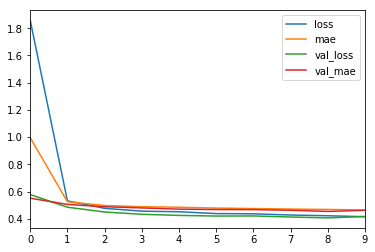

In [49]:
df.plot()
pass

In [50]:
model.evaluate(X_test_s, y_test)

5160/5160 [==============================] - 0s 35us/sample - loss: 0.4270 - mae: 0.4642


[0.4270468956278276, 0.46417126]

In [51]:
np.c_[model.predict(X_test_s[:3, :]), y_test[:3]]

array([[0.97243857, 1.04      ],
       [1.58840811, 1.65      ],
       [0.96830416, 0.83      ]])

In [80]:
model.save('housing.h5')

In [81]:
model = keras.models.load_model('housing.h5')

## Tensorflow proability

### Distributions

In [52]:
[str(x).split('.')[-1][:-2] for x in tfd.distribution.Distribution.__subclasses__()]

['ConditionalDistribution',
 'Autoregressive',
 'BatchReshape',
 'Bernoulli',
 'Beta',
 'Multinomial',
 'Binomial',
 'Blockwise',
 'Categorical',
 'Cauchy',
 'Gamma',
 'TransformedDistribution',
 '_BaseDeterministic',
 '_BaseDeterministic',
 'Dirichlet',
 'DirichletMultinomial',
 'Empirical',
 'GammaGamma',
 'Normal',
 'Geometric',
 'Uniform',
 'HalfCauchy',
 'HalfNormal',
 'HiddenMarkovModel',
 'Horseshoe',
 'Independent',
 'InverseGamma',
 'InverseGaussian',
 'JointDistribution',
 'Laplace',
 'LinearGaussianStateSpaceModel',
 'LKJ',
 'Logistic',
 'Mixture',
 'MixtureSameFamily',
 'MultivariateStudentTLinearOperator',
 'NegativeBinomial',
 'OneHotCategorical',
 'Pareto',
 'Poisson',
 'PoissonLogNormalQuadratureCompound',
 'QuantizedDistribution',
 'ExpRelaxedOneHotCategorical',
 'Sample',
 'StudentT',
 'Triangular',
 'TruncatedNormal',
 'VectorDiffeomixture',
 'VonMises',
 'VonMisesFisher',
 '_WishartLinearOperator',
 'Zipf',
 '_TensorCoercible']

In [53]:
dist = tfd.Normal(loc=100, scale=15)

In [54]:
x = dist.sample((3,4))
x

<tf.Tensor: id=40381, shape=(3, 4), dtype=float32, numpy=
array([[ 85.994514,  97.646706,  94.947174, 117.32828 ],
       [111.22745 , 102.00683 , 107.21807 , 101.29047 ],
       [ 92.01316 , 111.45788 ,  97.36463 , 124.13283 ]], dtype=float32)>

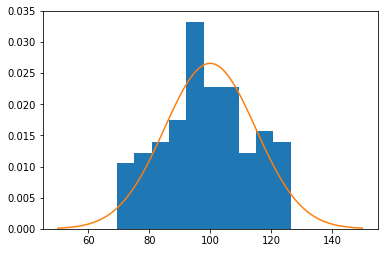

In [55]:
n = 100
xs = dist.sample(n)
plt.hist(xs, density=True)
xp = tf.linspace(50., 150., 100)
plt.plot(xp, dist.prob(xp))
pass

### Broadcasting

In [56]:
dist = tfd.Normal(loc=[3,4,5,6], scale=0.5)

In [57]:
dist.sample(5)

<tf.Tensor: id=40506, shape=(5, 4), dtype=float32, numpy=
array([[2.9720945, 4.0878305, 5.4115677, 5.4803023],
       [2.3959792, 4.4667177, 5.6659327, 5.7601957],
       [4.26844  , 3.9352567, 5.9535723, 6.14893  ],
       [2.587455 , 3.4145675, 4.2401953, 6.1878347],
       [3.5405107, 3.9414463, 4.8362327, 6.335392 ]], dtype=float32)>

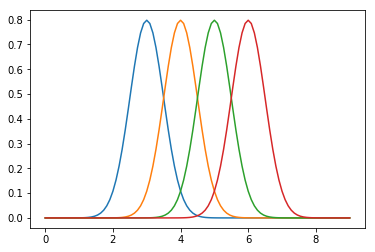

In [58]:
xp = tf.linspace(0., 9., 100)[:, tf.newaxis]
plt.plot(np.tile(xp, dist.batch_shape), dist.prob(xp))
pass

### Mixtures

In [59]:
tfd.MixtureSameFamily?

In [60]:
gmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
        probs=[0.4, 0.1, 0.2, 0.3]
    ),
    components_distribution=tfd.Normal(
      loc=[3., 4., 5., 6.],      
      scale=[0.1, 0.5, 0.5, .1])
)

In [61]:
n = 10000
xs = gmm.sample(n)

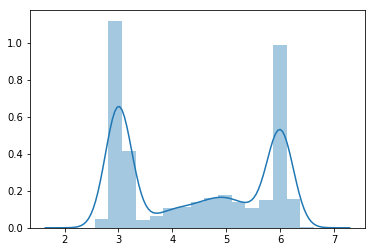

In [62]:
sns.distplot(xs)
pass

### Transformations

In [63]:
[x for x in dir(tfp.bijectors) if x[0].isupper()]

['AbsoluteValue',
 'Affine',
 'AffineLinearOperator',
 'AffineScalar',
 'AutoregressiveLayer',
 'BatchNormalization',
 'Bijector',
 'Blockwise',
 'Chain',
 'CholeskyOuterProduct',
 'CholeskyToInvCholesky',
 'ConditionalBijector',
 'DiscreteCosineTransform',
 'Exp',
 'Expm1',
 'FillTriangular',
 'Gumbel',
 'Identity',
 'Inline',
 'Invert',
 'IteratedSigmoidCentered',
 'Kumaraswamy',
 'MaskedAutoregressiveFlow',
 'MatrixInverseTriL',
 'MatvecLU',
 'NormalCDF',
 'Ordered',
 'Permute',
 'PowerTransform',
 'RealNVP',
 'Reciprocal',
 'Reshape',
 'ScaleTriL',
 'Sigmoid',
 'SinhArcsinh',
 'SoftmaxCentered',
 'Softplus',
 'Softsign',
 'Square',
 'Tanh',
 'TransformDiagonal',
 'Transpose',
 'Weibull']

In [64]:
lognormal = tfp.bijectors.Exp()(tfd.Normal(0, 0.5))

W0417 16:08:27.311493 4643866048 deprecation_wrapper.py:76] From /Users/cliburn/anaconda3/lib/python3.6/site-packages/tensorflow_probability/python/bijectors/bijector.py:992: The name shape is deprecated. Please use compat.v1.shape instead.

W0417 16:08:27.312743 4643866048 deprecation_wrapper.py:76] From /Users/cliburn/anaconda3/lib/python3.6/site-packages/tensorflow_probability/python/bijectors/bijector.py:1283: The name size is deprecated. Please use compat.v1.size instead.



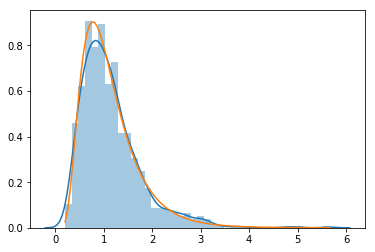

In [65]:
xs = lognormal.sample(1000)
sns.distplot(xs)
xp = np.linspace(tf.reduce_min(xs), tf.reduce_max(xs), 100)
plt.plot(xp, tfd.LogNormal(loc=0, scale=0.5).prob(xp))
pass

## Regression

In [66]:
xs = tf.Variable([0., 1., 2., 5., 6., 8.])
ys = tf.sin(xs) + tfd.Normal(loc=0, scale=0.5).sample(xs.shape[0])

In [67]:
xs.shape, ys.shape

(TensorShape([6]), TensorShape([6]))

In [68]:
xs.numpy()

array([0., 1., 2., 5., 6., 8.], dtype=float32)

In [69]:
ys.numpy()

array([ 0.31766635,  0.5954742 ,  0.7167998 , -0.06919491, -0.2230027 ,
        1.228898  ], dtype=float32)

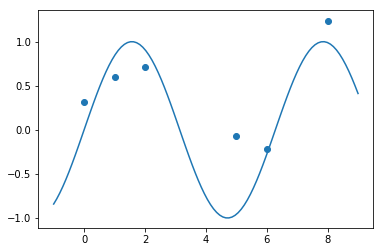

In [70]:
xp = tf.linspace(-1., 9., 100)[:, None]
plt.scatter(xs.numpy(), ys.numpy())
plt.plot(xp, tf.sin(xp))
pass

In [71]:
kernel = tfp.positive_semidefinite_kernels.ExponentiatedQuadratic(length_scale=1.5)
reg = tfd.GaussianProcessRegressionModel(
    kernel, xp[:, tf.newaxis], xs[:, tf.newaxis], ys
)

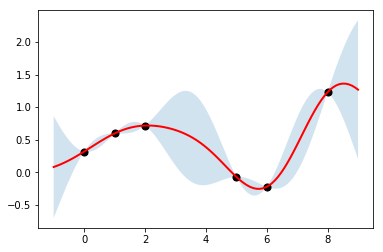

In [72]:
ub, lb = reg.mean() + [2*reg.stddev(), -2*reg.stddev()]
plt.fill_between(xp[..., 0], ub[...,0], lb[...,0], alpha=0.2)
plt.plot(xp, reg.mean(), c='red', linewidth=2)
plt.scatter(xs[:], ys[:], s=50, c='k')
pass

### Modeling

Sampling from a normal distribuiton using HMC (prior predictive samples)

In [73]:
[x for x in dir(tfp.mcmc) if x[0].isupper()]

['CheckpointableStatesAndTrace',
 'HamiltonianMonteCarlo',
 'MetropolisAdjustedLangevinAlgorithm',
 'MetropolisHastings',
 'RandomWalkMetropolis',
 'ReplicaExchangeMC',
 'SimpleStepSizeAdaptation',
 'SliceSampler',
 'StatesAndTrace',
 'TransformedTransitionKernel',
 'TransitionKernel',
 'UncalibratedHamiltonianMonteCarlo',
 'UncalibratedLangevin',
 'UncalibratedRandomWalk']

In [74]:
dir(tfp.vi)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_allowed_symbols',
 'amari_alpha',
 'arithmetic_geometric',
 'chi_square',
 'csiszar_vimco',
 'csiszar_vimco_helper',
 'dual_csiszar_function',
 'jeffreys',
 'jensen_shannon',
 'kl_forward',
 'kl_reverse',
 'log1p_abs',
 'modified_gan',
 'monte_carlo_csiszar_f_divergence',
 'pearson',
 'squared_hellinger',
 'symmetrized_csiszar_function',
 't_power',
 'total_variation',
 'triangular']

In [75]:
from tensorflow_probability import edward2 as ed

In [76]:
# From example in help docs

def unnormalized_log_prob(x):
    return -x - x**2.
 
# Initialize the HMC transition kernel.
num_results = int(1e2)
num_burnin_steps = int(1e2)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=unnormalized_log_prob,
        num_leapfrog_steps=3,
        step_size=1.),
    num_adaptation_steps=int(num_burnin_steps * 0.8))
 
# Run the chain (with burn-in).
samples, is_accepted = tfp.mcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=1.,
    kernel=adaptive_hmc,
    trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)
 
sample_mean = tf.reduce_mean(samples)
sample_stddev = tf.math.reduce_std(samples)

W0417 16:08:28.351274 4643866048 deprecation_wrapper.py:76] From /Users/cliburn/anaconda3/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/hmc.py:784: The name zeros_like is deprecated. Please use compat.v1.zeros_like instead.

W0417 16:08:28.354593 4643866048 deprecation_wrapper.py:76] From /Users/cliburn/anaconda3/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/metropolis_hastings.py:272: The name ones_like is deprecated. Please use compat.v1.ones_like instead.



In [77]:
sample_mean

<tf.Tensor: id=136175, shape=(), dtype=float32, numpy=-0.6822989>

In [78]:
sample_stddev

<tf.Tensor: id=136182, shape=(), dtype=float32, numpy=0.7804036>

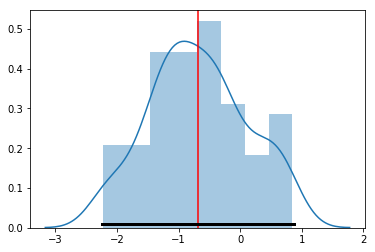

In [79]:
sns.distplot(samples)
plt.axvline(sample_mean.numpy(), c='red')
plt.plot([sample_mean - 2*sample_stddev, sample_mean + 2*sample_stddev], 
         [0.01, 0.01], c='k', linewidth=3)
pass